A practical introduction to Pandas
===================

We have been asked to *analyze an otp dataset*, without much more information. This kind of scenario is more common than you might imagine!

## 1) Quickly examine the files in ~/Data/us_dot/otp. What do they contain, in both technical and functional terms? (Use any tool you want)

In [1]:
path_to_zips = '../data/us_dot/otp/'

For this example, we are going to begin using the shell from within this notebook, with the ! notation:

A ! sign before a line tells the notebook to send that line straight away to the underlying OS. 

\* Note that we can substitute python variables into the shell command. We do that by surrounding the name of the variable with curly braces ({}). That's what we are going to do with the `path_to_files` variable

### Check what the files contain

In [2]:
! ls {path_to_zips} 

On_Time_On_Time_Performance_2015_1.zip	On_Time_On_Time_Performance_2015_5.zip
On_Time_On_Time_Performance_2015_2.zip	On_Time_On_Time_Performance_2015_6.zip
On_Time_On_Time_Performance_2015_3.zip	On_Time_On_Time_Performance_2015_7.zip
On_Time_On_Time_Performance_2015_4.zip	On_Time_On_Time_Performance_2015_8.zip


In [3]:
! unzip -l {path_to_zips}On_Time_On_Time_Performance_2015_1.zip

Archive:  ../data/us_dot/otp/On_Time_On_Time_Performance_2015_1.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
211633432  2015-04-16 20:02   On_Time_On_Time_Performance_2015_1.csv
    12054  2015-04-16 20:02   readme.html
---------                     -------
211645486                     2 files


Oh, it has a readme! Always good to read it.

### Unzip the readme to the current directory

In [4]:
! unzip -o {path_to_zips}On_Time_On_Time_Performance_2015_1.zip readme.html -d $(pwd)

Archive:  ../data/us_dot/otp/On_Time_On_Time_Performance_2015_1.zip
  inflating: /home/dani/dev/master-data-science/07_pandas_for_data_science/readme.html  


The readme file is html. Luckily, we are working in an html environment. 

### Display the contents of `readme.html` within the notebook
(Hint: check out IPython.display.IFrame)

In [5]:
from IPython.display import IFrame
IFrame('readme.html', width=700, height=350)

That's some very good documentation!

### Summary: 

The files within the zip are " quoted csv's. They contain information on timeliness of departures in the US, at the departure level.

In [6]:
! unzip -p {path_to_zips}On_Time_On_Time_Performance_2015_1.zip | head -n 2

"Year","Quarter","Month","DayofMonth","DayOfWeek","FlightDate","UniqueCarrier","AirlineID","Carrier","TailNum","FlightNum","OriginAirportID","OriginAirportSeqID","OriginCityMarketID","Origin","OriginCityName","OriginState","OriginStateFips","OriginStateName","OriginWac","DestAirportID","DestAirportSeqID","DestCityMarketID","Dest","DestCityName","DestState","DestStateFips","DestStateName","DestWac","CRSDepTime","DepTime","DepDelay","DepDelayMinutes","DepDel15","DepartureDelayGroups","DepTimeBlk","TaxiOut","WheelsOff","WheelsOn","TaxiIn","CRSArrTime","ArrTime","ArrDelay","ArrDelayMinutes","ArrDel15","ArrivalDelayGroups","ArrTimeBlk","Cancelled","CancellationCode","Diverted","CRSElapsedTime","ActualElapsedTime","AirTime","Flights","Distance","DistanceGroup","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","FirstDepTime","TotalAddGTime","LongestAddGTime","DivAirportLandings","DivReachedDest","DivActualElapsedTime","DivArrDelay","DivDistance","Div1Airport","Div1A

Pretty unreadable, so we go for a tool designed specifically for tabular data: **pandas**

### Load some of the data (one of the files) into memory as a pandas dataframe. What functions do you need to use?

Pro tip: there is no need to decompress the whole file. Check out zipfile.ZipFile

First, open a connection to one of the files

In [7]:
import os
import zipfile

filenames = os.listdir(path_to_zips)

zip_file = zipfile.ZipFile(path_to_zips + filenames[0])

csv_file = zip_file.open(filenames[0].split('.')[0] + '.csv')

Now we're ready to load the file into memory as a pandas dataframe. Remember to close the connections to the files!

In [8]:
import pandas as pd 

df = pd.read_csv(csv_file, header=0)

csv_file.close()
zip_file.close()

/home/dani/dev/master-data-science/06_python_for_data_science/env/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's start examining the data: show the beginning of the file. How many records does it contain?

In [9]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2015,3,8,2,7,2015-08-02,AA,19805,AA,N790AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,3,8,3,1,2015-08-03,AA,19805,AA,N784AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,3,8,4,2,2015-08-04,AA,19805,AA,N793AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,3,8,5,3,2015-08-05,AA,19805,AA,N787AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,3,8,6,4,2015-08-06,AA,19805,AA,N790AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
len(df)

510536

## Trimming the data

The table is quite wide, and it seems that there are many columns without much data. Which, exactly, are those? (let's consider empty a column that doesn't contain at least 1000 records, arbitrarily)

In [11]:
non_null_counts = df.count()

non_null_counts[non_null_counts < 1000]

Div2Airport         10
Div2AirportID       10
Div2AirportSeqID    10
Div2WheelsOn        10
Div2TotalGTime      10
Div2LongestGTime    10
Div2WheelsOff        3
Div2TailNum          3
Div3Airport          0
Div3AirportID        0
Div3AirportSeqID     0
Div3WheelsOn         0
Div3TotalGTime       0
Div3LongestGTime     0
Div3WheelsOff        0
Div3TailNum          0
Div4Airport          0
Div4AirportID        0
Div4AirportSeqID     0
Div4WheelsOn         0
Div4TotalGTime       0
Div4LongestGTime     0
Div4WheelsOff        0
Div4TailNum          0
Div5Airport          0
Div5AirportID        0
Div5AirportSeqID     0
Div5WheelsOn         0
Div5TotalGTime       0
Div5LongestGTime     0
Div5WheelsOff        0
Div5TailNum          0
Unnamed: 109         0
dtype: int64

It seems that the "diverted" fields, after the first, are often empty. No big surprise, since not that many flights must be diverted more than once in a month. Let's drop those columns, since we are not that interested in those, at least for now.

In [12]:
df.drop(non_null_counts[non_null_counts < 1000].index, inplace=True, axis=1)

In [13]:
len(df.columns)

77

Now that we have eliminated some inconvenient data columns, let's have a look at the rest:

Let's loook at how the location data is encoded.

### Select the columns that have 'Origin' in their name

Hint: we are going to use the str attribute of Series and Indexes

In [14]:
col_contains_origin = df.columns.str.contains('Origin')

df.columns[col_contains_origin]

Index([u'OriginAirportID', u'OriginAirportSeqID', u'OriginCityMarketID',
       u'Origin', u'OriginCityName', u'OriginState', u'OriginStateFips',
       u'OriginStateName', u'OriginWac'],
      dtype='object')

Let's now have a look at these. We have been using the .head() method, but that always returns the same values, so it's not that good for getting a feel for the data. Let's start using a better one, that will give us a sample of the data: df.sample()

In [15]:
df[df.columns[col_contains_origin]].sample(5)

,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac
161899,13204,1320402,31454,MCO,"Orlando, FL",FL,12,Florida,33
196743,14771,1477102,32457,SFO,"San Francisco, CA",CA,6,California,91
498627,10257,1025702,30257,ALB,"Albany, NY",NY,36,New York,22
13956,12953,1295302,31703,LGA,"New York, NY",NY,36,New York,22
121416,10397,1039705,30397,ATL,"Atlanta, GA",GA,13,Georgia,34


So much redundant information!!!!! Let's drop a few of those fields. Remember, 90% of the time spent in Data Science is data cleaning... 

### Do the same for the destination columns

In [16]:
col_contains_dest = df.columns.str.contains('Dest')

df.columns[col_contains_dest]

Index([u'DestAirportID', u'DestAirportSeqID', u'DestCityMarketID', u'Dest',
       u'DestCityName', u'DestState', u'DestStateFips', u'DestStateName',
       u'DestWac', u'DivReachedDest'],
      dtype='object')

### Now, discard all these columns with redundant information. 

The set of columns we want to discard is 

`df.columns[col_contains_dest] + df.columns[col_contains_origin] - columns_of_interest`

We'll also use the opportunity to drop Year, Month, Day and Quarter columns since that is information that is already contained in FlightDate. We'll keep the DayOfWeek, though.

In [17]:
columns_of_interest = pd.Index(['Origin', 'OriginCityName', 'OriginStateName', 'Dest', 'DestCityName', 'DestStateName'])


In [18]:
# We could build the Index (or list) in a single line, but this way it's more readable:

cols_to_drop = pd.Index(['Year', 'Month', 'Quarter', 'DayofMonth'])

cols_to_drop = cols_to_drop | df.columns[col_contains_dest]

cols_to_drop = cols_to_drop | df.columns[col_contains_origin]

cols_to_drop = cols_to_drop.difference(columns_of_interest)

In [19]:
df.drop(cols_to_drop, inplace=True, axis=1)

In [20]:
df.sample(5)

,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,...,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum
344954,3,2015-08-26,OO,20304,OO,N956SW,6388,DEN,"Denver, CO",Colorado,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98618,6,2015-08-08,B6,20409,B6,N623JB,672,FLL,"Fort Lauderdale, FL",Florida,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37857,1,2015-08-31,AA,19805,AA,N425AA,2330,DFW,"Dallas/Fort Worth, TX",Texas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310519,4,2015-08-27,EV,20366,EV,N17108,6143,CWA,"Mosinee, WI",Wisconsin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392439,1,2015-08-10,DL,19790,DL,N348NB,1660,DTW,"Detroit, MI",Michigan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


OK, so we have cleaned up most of the date / location information,  and some of the extra information that was not really useful, in the process reducing the dataframe from 110 columns to 60. Let's look at the really interesting info: delays.

### Select all columns that contain 'Delay' in their column name

In [21]:
# We could do this like we did with the origin and destination columns:

delay_columns = df.columns.str.contains('Delay')

# But I'm going to take this opportunity to exemplify a somewhat advanced feature of python: anonymous functions ('lambdas')

delay_columns_withlambda = df.columns.map(lambda string: 'Delay' in string)

# This is exactly equivalent to the following alternative without using lambdas, which may be easier to understand:

def contains_delay(string):
    return 'Delay' in string

df.columns.map(contains_delay)

(delay_columns == delay_columns_withlambda).all()

True

In [22]:
df[df.columns[delay_columns]].sample(5)

,DepDelay,DepDelayMinutes,DepartureDelayGroups,ArrDelay,ArrDelayMinutes,ArrivalDelayGroups,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DivArrDelay
387186,0,0,0,-18,0,-2,NaN,NaN,NaN,NaN,NaN,NaN
136987,17,17,1,-2,0,-1,NaN,NaN,NaN,NaN,NaN,NaN
436010,-5,0,-1,-10,0,-1,NaN,NaN,NaN,NaN,NaN,NaN
85743,5,5,0,-14,0,-1,NaN,NaN,NaN,NaN,NaN,NaN
223860,-3,0,-1,-18,0,-2,NaN,NaN,NaN,NaN,NaN,NaN


OK, we are going to center our attention in the DepDelay column, so we won't need the others. 

### Drop those too. 

We already know the drill, don't we?

In [23]:
df.drop(df.columns[delay_columns].difference(['DepDelay']), axis=1, inplace=True)

We are not that interested in the 'Diverted' columns either, so let's drop those too

In [24]:
df.drop(df.columns[df.columns.str.startswith('Div')], axis=1, inplace=True)

All of this is getting a little repetitive and boring, so let's just specify the columns we want:

In [25]:
df = df[['FlightDate', 'DayOfWeek', 'Carrier', 'TailNum', 'FlightNum', 'Origin', 
         'OriginCityName', 'OriginStateName', 'Dest', 'DestCityName', 'DestStateName',
         'DepTime', 'DepDelay', 'AirTime', 'Distance']]
df.sample(5)

,FlightDate,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,DepDelay,AirTime,Distance
476122,2015-08-30,7,EV,N13975,4862,IAH,"Houston, TX",Texas,AEX,"Alexandria, LA",Louisiana,2100,-10,34,190
40452,2015-08-23,7,AA,N4XBAA,2487,CMH,"Columbus, OH",Ohio,DFW,"Dallas/Fort Worth, TX",Texas,758,-2,122,926
312165,2015-08-08,6,OO,N629BR,4807,HLN,"Helena, MT",Montana,SLC,"Salt Lake City, UT",Utah,1301,1,68,402
244151,2015-08-30,7,WN,N414WN,1511,BWI,"Baltimore, MD",Maryland,DEN,"Denver, CO",Colorado,1115,-5,193,1491
81954,2015-08-10,1,AS,N531AS,764,PDX,"Portland, OR",Oregon,DCA,"Washington, DC",Virginia,938,-2,263,2350


## Formatting columns and parsing dates and times

Hurray! we have almost cleaned our dataset. Soon we will begin to do some actual work with it. 

Pandas interpreted the Deptime column as ints and the FlighDate column as strings. We want to combine them and parse them into a DateTime column, so that we can use them properly as datetimes.

First, 

### Define a function that will parse our int hours into a reasonable format ("HH:MM")

In [26]:
time_to_proper_format = lambda x: '%02d:%02d' % ((x / 100) % 24 , x% 100)

Now, we can use that function to build datetime strings that we will then pass to pd.to_datetime, with a format we will specify. Let's do that

Hint: Check out pd.to_datetime

### Overwrite the 'DepTime' column with its version in the proper format

Hint: Before overwriting your column in the dataframe, make sure that everything works by assigning the modified column to a Series variable.

In [27]:
df['DepTime'] = df['DepTime'].fillna(0.0).astype(int).map(time_to_proper_format)

### Now, create a DepDateTime with the proper type using `pd.to_datetime`

In [28]:
df['DepDateTime'] = departure_datetimes = pd.to_datetime(df['FlightDate'] + ' ' + df['DepTime'], format='%Y-%m-%d %H:%M')

# Drop the now-redundant columns
df.drop(['FlightDate', 'DepTime'], inplace=True, axis=1)

In [29]:
df.sample(5)

,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepDelay,AirTime,Distance,DepDateTime
381032,5,UA,N815UA,295,DEN,"Denver, CO",Colorado,RNO,"Reno, NV",Nevada,-7,112,804,2015-08-07 11:12:00
354725,3,UA,N818UA,493,DEN,"Denver, CO",Colorado,IND,"Indianapolis, IN",Indiana,18,123,977,2015-08-26 17:33:00
97731,1,B6,N328JB,759,BOS,"Boston, MA",Massachusetts,PHL,"Philadelphia, PA",Pennsylvania,5,60,280,2015-08-10 12:15:00
83719,3,AS,N594AS,743,SLC,"Salt Lake City, UT",Utah,SFO,"San Francisco, CA",California,-8,92,599,2015-08-12 07:17:00
368826,6,UA,N522UA,778,SFO,"San Francisco, CA",California,ORD,"Chicago, IL",Illinois,-3,227,1846,2015-08-15 09:33:00


### Inspect the types, see if everything is in order

In [30]:
df.dtypes

DayOfWeek                   int64
Carrier                    object
TailNum                    object
FlightNum                   int64
Origin                     object
OriginCityName             object
OriginStateName            object
Dest                       object
DestCityName               object
DestStateName              object
DepDelay                  float64
AirTime                   float64
Distance                  float64
DepDateTime        datetime64[ns]
dtype: object

### Transform the FlightNum column into a column of strings

In [31]:
df['FlightNum'] = df['FlightNum'].map(str)

In [32]:
df.dtypes

DayOfWeek                   int64
Carrier                    object
TailNum                    object
FlightNum                  object
Origin                     object
OriginCityName             object
OriginStateName            object
Dest                       object
DestCityName               object
DestStateName              object
DepDelay                  float64
AirTime                   float64
Distance                  float64
DepDateTime        datetime64[ns]
dtype: object

## Examining the data

Finally clean! Let's start to do some preliminary work on the data.

### Find the biggest delays. 

How would you find the 5 maximum delays?

In [33]:
df.sort_values(by='DepDelay', ascending=False).head()

,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepDelay,AirTime,Distance,DepDateTime
4106,6,AA,N479AA,96,RIC,"Richmond, VA",Virginia,DFW,"Dallas/Fort Worth, TX",Texas,1878,156,1158,2015-08-01 14:27:00
7165,7,AA,N5ERAA,270,HNL,"Honolulu, HI",Hawaii,LAX,"Los Angeles, CA",California,1515,299,2556,2015-08-23 08:25:00
19225,6,AA,N503AA,1291,MKE,"Milwaukee, WI",Wisconsin,DFW,"Dallas/Fort Worth, TX",Texas,1402,108,853,2015-08-01 06:27:00
33642,1,AA,N469AA,2263,CMH,"Columbus, OH",Ohio,DFW,"Dallas/Fort Worth, TX",Texas,1259,125,926,2015-08-10 08:24:00
7028,1,AA,N5DHAA,266,LIH,"Lihue, HI",Hawaii,LAX,"Los Angeles, CA",California,1235,292,2615,2015-08-10 10:33:00


### What was the average delay for this month? Standard deviation and typical value?

In [34]:
df['DepDelay'].describe()

count    505817.000000
mean          9.932045
std          36.920822
min         -42.000000
25%          -5.000000
50%          -1.000000
75%           8.000000
max        1878.000000
Name: DepDelay, dtype: float64

Also: a quick look at the correlation between the numerical variables is extremely easy with pandas:

In [35]:
df.corr()

,DayOfWeek,DepDelay,AirTime,Distance
DayOfWeek,1.000000,-0.014803,0.011359,0.016482
DepDelay,-0.014803,1.000000,0.024412,0.025826
AirTime,0.011359,0.024412,1.000000,0.991452
Distance,0.016482,0.025826,0.991452,1.000000


### A little taste of groupby

Very often, we will want to split our data according to a variable, then compute some statistics on the different groups. We will see this in depth next week, but I want to give you a little taste.

What is the plane that has the highest average delay? We'll first group by tail number (the *license plate* of a plane) and then calculate the relevant statistic for each group (group of *departures*)

In [36]:
grouped_by_plane = df.groupby('TailNum')

In [37]:
grouped_by_plane['DepDelay'].mean().sort_values(ascending=False).head(10)

TailNum
N37018    293.000000
N218UA    270.000000
N283AY    208.000000
N795UA    193.000000
N7AEAA    191.666667
N182DN    187.500000
N793UA    136.750000
N7AHAA    115.250000
N7BPAA     98.500000
N7BXAA     92.800000
Name: DepDelay, dtype: float64

Oh, but those numbers smell like these planes had only a few, very delayed, departures! how can we count the number of departures *and* calculate the average delay at the same time?

In [38]:
delays_by_plane = grouped_by_plane['DepDelay'].agg(['mean', 'count'])

In [39]:
delays_by_plane.sort_values('mean', ascending=False)

,mean,count
TailNum,,
N37018,293.000000,2
N218UA,270.000000,1
N283AY,208.000000,2
N795UA,193.000000,1
N7AEAA,191.666667,3
N182DN,187.500000,2
N793UA,136.750000,4
N7AHAA,115.250000,4
N7BPAA,98.500000,2


Awesome! now, let's look at the average delay of the planes with some departures (let's say, at least 15)

In [40]:
delays_by_plane[delays_by_plane['count'] > 14].sort_values('mean', ascending=False)

,mean,count
TailNum,,
N357AA,90.047619,21
N13110,74.187500,16
N448SW,71.473684,19
N780UA,62.368421,19
N374SW,61.173913,23
N76064,59.000000,15
N8ACAA,56.187500,16
N5ELAA,50.076923,78
N73275,49.949153,59


## Plotting

There are several ways in which we could go about this. 

For example, do the delays have a relationship with the number of departures a plane does?

In [41]:
import matplotlib.pyplot as plt 
%matplotlib inline

(-10, 240)

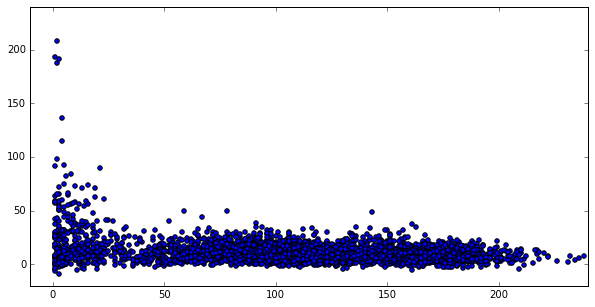

In [42]:
f, ax1 = plt.subplots(figsize=(10,5))
_ = plt.scatter(delays_by_plane['count'], delays_by_plane['mean'])

ax1.set_ylim(-20, 240)
ax1.set_xlim(-10, 240)


 Another question: how do the delays stack over the course of the day?

In [43]:
df['DepHour'] =  df['DepDateTime'].map(lambda x: x.hour)

by_hour = df.groupby('DepHour')

hours = []
groups = []

for h, g in by_hour:
    hours.append("%02d" % h)
    groups.append(g['DepDelay'])

/home/dani/dev/master-data-science/06_python_for_data_science/env/local/lib/python2.7/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


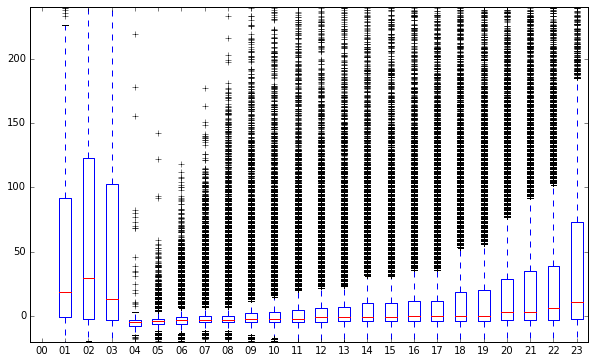

In [44]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_ylim(-20, 240)

bp = plt.boxplot(groups)

labels = plt.setp(ax1, xticklabels=hours)

## Self study:

Now, you can try the above with the whole dataset. First, we need to join all the zipped csvs into one dataframe. How would you do that? Do you think you could run into memory problems? How would you avoid that?

In [ ]:
dfs = []

for f in filenames:
    
    this_zip_file = zipfile.ZipFile(path_to_zips + f)
    
    this_csv = this_zip_file.open(f.split('.')[0] + '.csv')    
    
    df = pd.read_csv(this_csv, index_col=None, header=0)
    
    dfs.append(df)
    
    this_zip_file.close()
    
df = pd.concat(dfs, ignore_index=True)

Hints for reading large files: 
* selecting columns:
    `pd.read_csv(usecols=[list_of_interesting_column_names])`
* bcolz
* specify column types